In [41]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 0. Dataset

In [42]:
if True:
    addr_path = "assets/addr.csv"
    df = pd.read_csv(
        addr_path,
        header=None,
        names=["address", "block_number", "ether", "has_source"]
    )
    print(df.shape)
    print(df["block_number"].min())
    print(df["block_number"].max())

(100000, 4)
9580268
9927613


# 1. Draw coverage graph sorted by code len

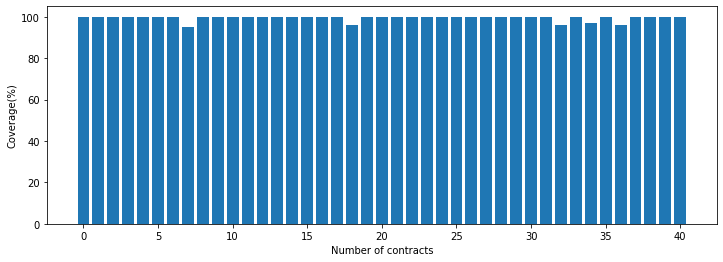

In [43]:
if True:
    sym_evm_path = "results/sym_evm_1.csv"
    df = pd.read_csv(sym_evm_path)
    df["coverage"] = round((df["covered_jumpis"] + 1) / (df["total_jumpis"] + 1) * 100)
    df = df.sort_values(by="bytelen")
    ys = df["coverage"].values
    xs = list(range(len(ys)))
    fig = plt.figure(figsize=(12, 4))
    #plt.title("Branch Coverage")
    plt.xlabel("Number of contracts")
    plt.ylabel("Coverage(%)")
    plt.bar(xs, ys)
    plt.show()
    fig.savefig('branch_coverage.eps', format='eps')

# 2. Duration

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


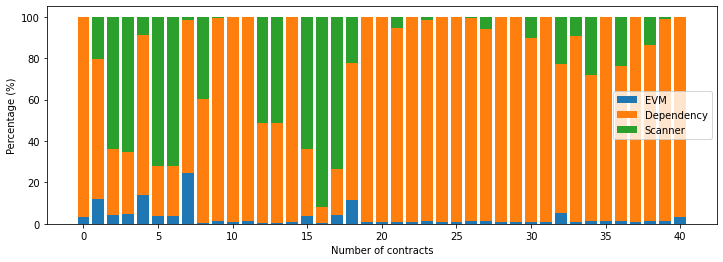

In [44]:
if True:
    sym_evm_path = "results/sym_evm_1.csv"
    df = pd.read_csv(sym_evm_path)
    df = df.sort_values(by="bytelen")
    concolic = df["concolic_duration"].values
    tainting = df["tainting_duration"].values
    scanner = df["scanner_duration"].values
    fig = plt.figure(figsize=(12, 4))
    xs = list(range(df.shape[0]))
    concolic_percentage = concolic / (concolic + tainting + scanner) * 100
    tainting_percentage = tainting / (concolic + tainting + scanner) * 100
    scanner_percentage = scanner / (concolic + tainting + scanner) * 100
    plt.bar(xs, concolic_percentage, label="EVM")
    plt.bar(xs, tainting_percentage, bottom=concolic_percentage, label="Dependency")
    plt.bar(xs, scanner_percentage, bottom=concolic_percentage + tainting_percentage, label="Scanner")
    plt.legend()
    plt.xlabel("Number of contracts")
    plt.ylabel("Percentage (%)")
    plt.plot()
    fig.savefig('duration.eps', format='eps')

# 3. Draw tainting

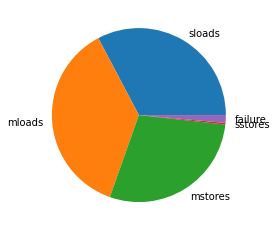

In [13]:
if True:
    sym_evm_path = "results/sym_evm_1.csv"
    df = pd.read_csv(sym_evm_path)
    labels = [
        "sloads",
        "mloads",
        "mstores",
        "sstores",
        "failure"
    ]
    fig = plt.figure()
    success_sloads = df["success_sloads"].sum()
    success_mloads = df["success_mloads"].sum()
    success_mstores = df["success_mstores"].sum()
    success_sstores = df["success_sstores"].sum()
    
    failed_sloads = df["failed_sloads"].sum()
    failed_mloads = df["failed_mloads"].sum()
    failed_mstores = df["failed_mstores"].sum()
    failed_sstores = df["failed_sstores"].sum()
    xs = [
        success_sloads,
        success_mloads,
        success_mstores,
        success_sstores,
        failed_sloads + failed_mloads + failed_mstores + failed_sstores
    ]
    plt.pie(xs, labels=labels)
    plt.show()

# 4.1. Draw tainting for each type

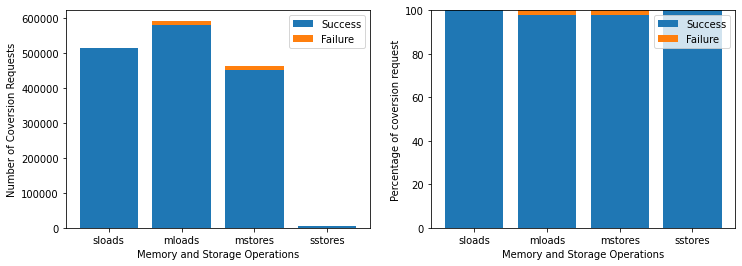

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [14]:
if True:
    sym_evm_path = "results/sym_evm_1.csv"
    df = pd.read_csv(sym_evm_path)
    xs = np.array([
        "sloads",
        "mloads",
        "mstores",
        "sstores",
    ])
    fig = plt.figure(figsize=(12, 4))
    ## First
    plt.subplot(121)
    success_sloads = df["success_sloads"].sum()
    success_mloads = df["success_mloads"].sum()
    success_mstores = df["success_mstores"].sum()
    success_sstores = df["success_sstores"].sum()
    success = np.array([success_sloads, success_mloads, success_mstores, success_sstores])
    plt.bar(xs, success, label="Success")
    
    failed_sloads = df["failed_sloads"].sum()
    failed_mloads = df["failed_mloads"].sum()
    failed_mstores = df["failed_mstores"].sum()
    failed_sstores = df["failed_sstores"].sum()
    
    failure = np.array([failed_sloads, failed_mloads, failed_mstores, failed_sstores])
    plt.bar(xs, failure, bottom=success, label="Failure")
    plt.ylabel("Number of Coversion Requests")
    plt.xlabel("Memory and Storage Operations")
    #plt.title("Variable Resolved by sGuard")
    plt.legend()
    ## Second
    plt.subplot(122)
    success = np.array([
        round(success_sloads / (success_sloads + failed_sloads) * 100),
        round(success_mloads / (success_mloads + failed_mloads) * 100),
        round(success_mstores / (success_mstores + failed_mstores) * 100),
        round(success_sstores / (success_sstores + failed_sstores ) * 100),
    ])
    plt.bar(xs, success, label="Success")
    failure = np.array([
        100 - round(success_sloads / (success_sloads + failed_sloads) * 100),
        100 - round(success_mloads / (success_mloads + failed_mloads) * 100),
        100 - round(success_mstores / (success_mstores + failed_mstores) * 100),
        100 - round(success_sstores / (success_sstores + failed_sstores ) * 100),
    ])
    plt.bar(xs, failure, bottom=success, label="Failure")
    plt.ylabel("Percentage of coversion request")
    plt.xlabel("Memory and Storage Operations")
    #plt.title("Variable Resolved by sGuard")
    plt.legend()
    plt.show()
    fig.savefig('taint_analysis.eps', format='eps')

# 5. Bugs

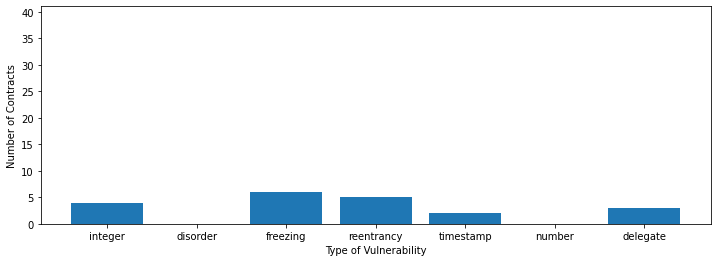

In [15]:
if True:
    sym_evm_path = "results/sym_evm_1.csv"
    df = pd.read_csv(sym_evm_path)
    xs = [
        "integer",
        "disorder",
        "freezing",
        "reentrancy",
        "timestamp",
        "number",
        "delegate"
    ]
    fig = plt.figure(figsize=(12, 4))
    ys = [
        df["integer"].sum(),
        df["disorder"].sum(),
        df["frez"].sum(),
        df["reentrancy"].sum(),
        df["timestamp"].sum(),
        df["number"].sum(),
        df["delegate"].sum(),
    ]
    plt.bar(xs, ys)
    plt.ylim(0, df.shape[0])
    plt.ylabel("Number of Contracts")
    plt.xlabel("Type of Vulnerability")
    plt.show()
    fig.savefig('scanner.eps', format='eps')